<a href="https://colab.research.google.com/github/Yoanvari/PCVK2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
from skimage import io
import math
import glob

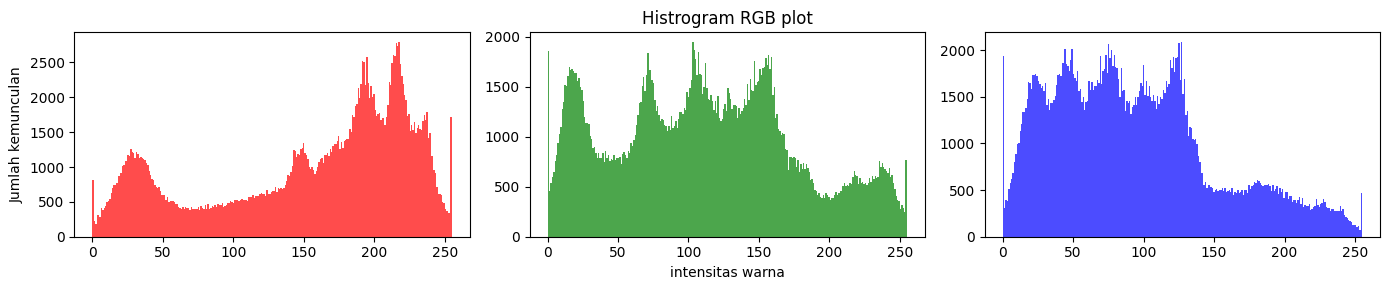

In [ ]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/lena.jpg')

# Memisahkan channel warna
blue_channel = image[:,:,0]
green_channel = image[:,:,1]
red_channel = image[:,:,2]

# Membuat histogram untuk setiap channel
plt.figure(figsize=(14, 3))

# Histogram untuk Red Channel
plt.subplot(1, 3, 1)
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.7)
plt.ylabel('Jumlah kemunculan')

# Histogram untuk Green Channel
plt.subplot(1, 3, 2)
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Histrogram RGB plot')
plt.xlabel('intensitas warna')

# Histogram untuk Blue Channel
plt.subplot(1, 3, 3)
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.7)

# Menampilkan histogram
plt.tight_layout()
plt.show()

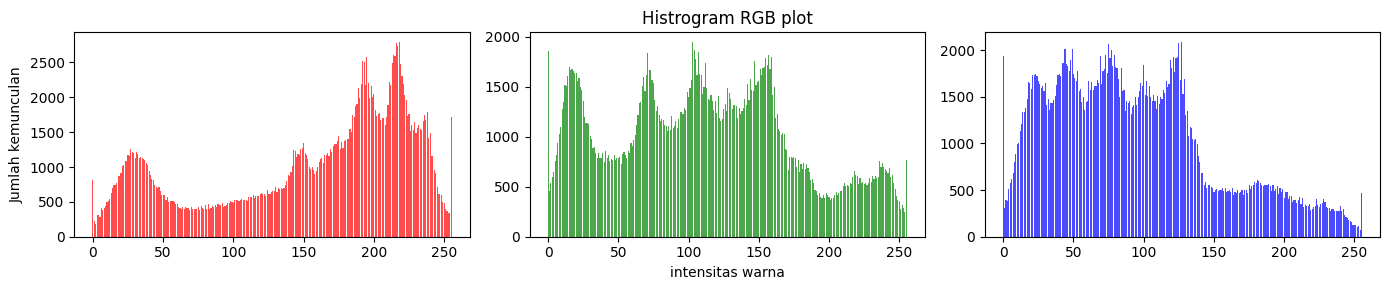

In [ ]:
# Menghitung histogram menggunakan numpy
red_hist, red_bins = np.histogram(red_channel, bins=256, range=(0, 256))
green_hist, green_bins = np.histogram(green_channel, bins=256, range=(0, 256))
blue_hist, blue_bins = np.histogram(blue_channel, bins=256, range=(0, 256))

# Membuat histogram untuk setiap channel
plt.figure(figsize=(14, 3))

# Histogram untuk Red Channel
plt.subplot(1, 3, 1)
plt.bar(red_bins[:-1], red_hist, color='red', alpha=0.7)
plt.ylabel('Jumlah kemunculan')

# Histogram untuk Green Channel
plt.subplot(1, 3, 2)
plt.bar(green_bins[:-1], green_hist, color='green', alpha=0.7)
plt.title('Histrogram RGB plot')
plt.xlabel('intensitas warna')

# Histogram untuk Blue Channel
plt.subplot(1, 3, 3)
plt.bar(blue_bins[:-1], blue_hist, color='blue', alpha=0.7)

# Menampilkan histogram
plt.tight_layout()
plt.show()

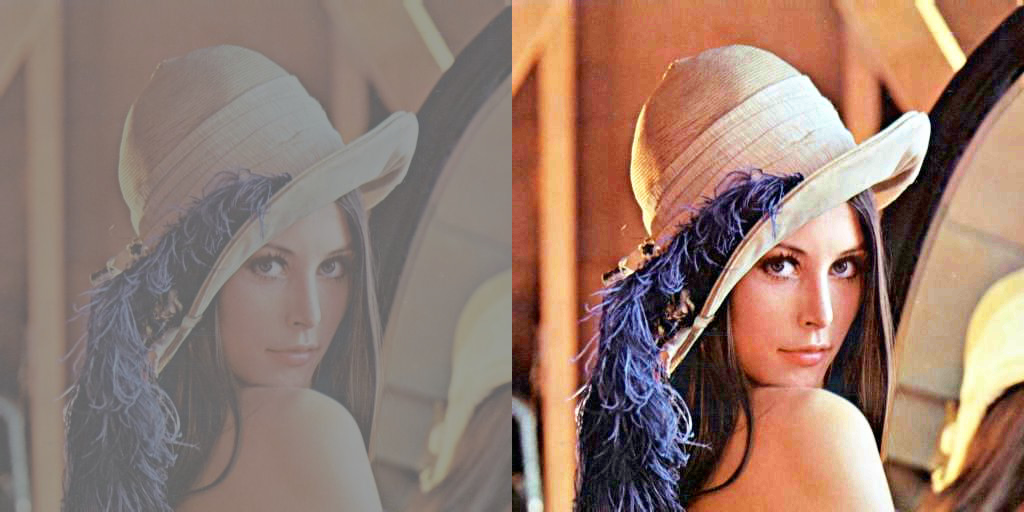

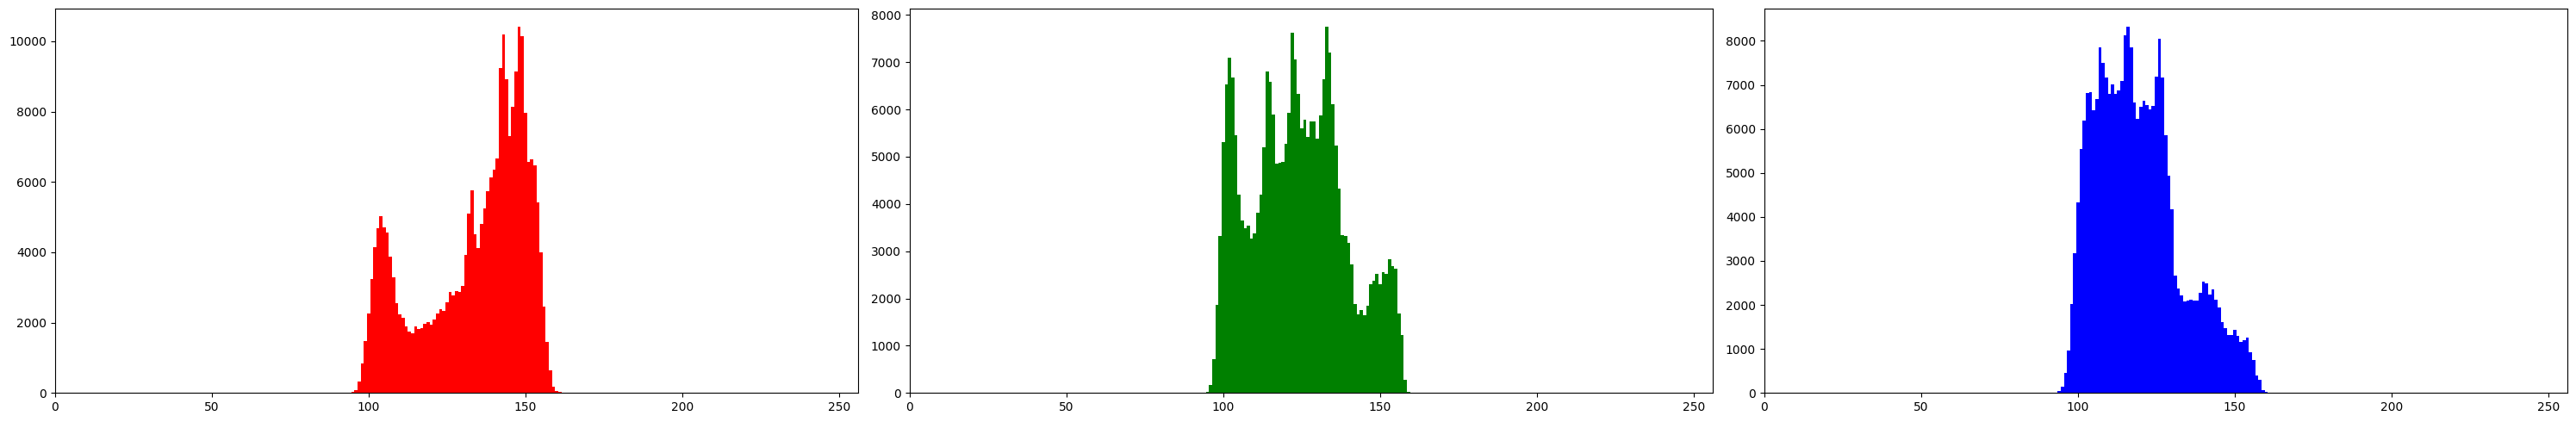

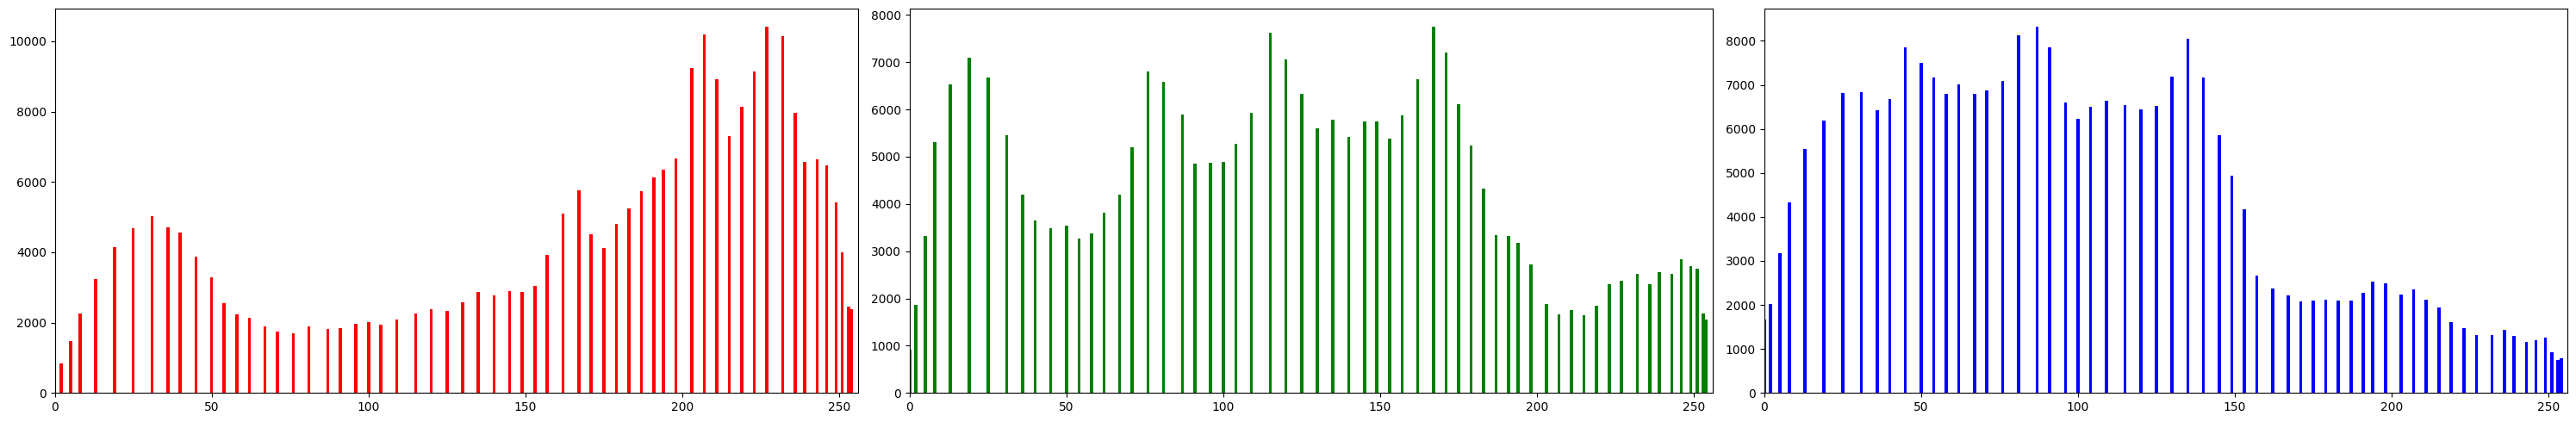

In [ ]:
lena_lc = cv.imread('/content/drive/MyDrive/PCVK/image/lena_lc.jpg')

# Fungsi untuk mendapatkan histogram dari suatu channel
def compute_histogram(channel):
    hist = np.zeros(256)
    for intensity in channel:
        hist[intensity] += 1
    return hist

# Fungsi untuk menampilkan histogram dari gambar
def display_histogram(image):
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Memisahkan channel RGB
    red_channel, green_channel, blue_channel = cv.split(rgb_image)

    # Menghitung histogram menggunakan OpenCV
    red_hist = cv.calcHist([red_channel], [0], None, [256], [0, 256])
    green_hist = cv.calcHist([green_channel], [0], None, [256], [0, 256])
    blue_hist = cv.calcHist([blue_channel], [0], None, [256], [0, 256])

    # Menampilkan histogram
    plt.figure(figsize=(30, 5))

    plt.subplot(1, 3, 1)
    plt.bar(range(256), red_hist[:, 0], color='red', width=1)
    plt.xlim([0, 256])

    plt.subplot(1, 3, 2)
    plt.bar(range(256), green_hist[:, 0], color='green', width=1)
    plt.xlim([0, 256])

    plt.subplot(1, 3, 3)
    plt.bar(range(256), blue_hist[:, 0], color='blue', width=1)
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Mendapatkan histogram untuk setiap channel (Red, Green, Blue)
blue_channel, green_channel, red_channel = cv.split(lena_lc)
red_histogram = compute_histogram(red_channel.flatten())
green_histogram = compute_histogram(green_channel.flatten())
blue_histogram = compute_histogram(blue_channel.flatten())

# Menghitung histogram keseluruhan gambar
pixel_histogram = np.bincount(lena_lc.flatten(), minlength=256)

# Normalisasi histogram
total_pixels = np.sum(pixel_histogram)
normalized_hist = pixel_histogram / total_pixels

# Menghitung Cumulative Distribution Function (CDF)
cdf = np.cumsum(normalized_hist)

# Membuat transformasi dari CDF untuk equalization
transform_map = np.floor(255 * cdf).astype(np.uint8)

# Menerapkan transformasi ke gambar
flattened_image = lena_lc.flatten()
equalized_image_list = [transform_map[pixel_value] for pixel_value in flattened_image]
equalized_image = np.reshape(np.asarray(equalized_image_list), lena_lc.shape)

# Menggabungkan gambar asli dan hasil equalization untuk perbandingan
combined_image = cv.hconcat((lena_lc, equalized_image))
cv2_imshow(combined_image)

# Menampilkan histogram gambar asli dan hasil equalization
display_histogram(lena_lc)
display_histogram(equalized_image)

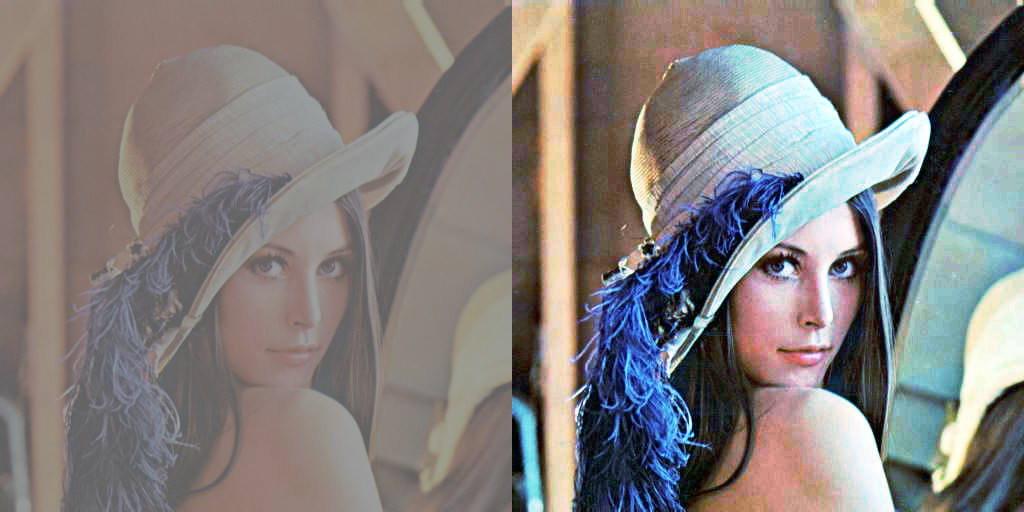

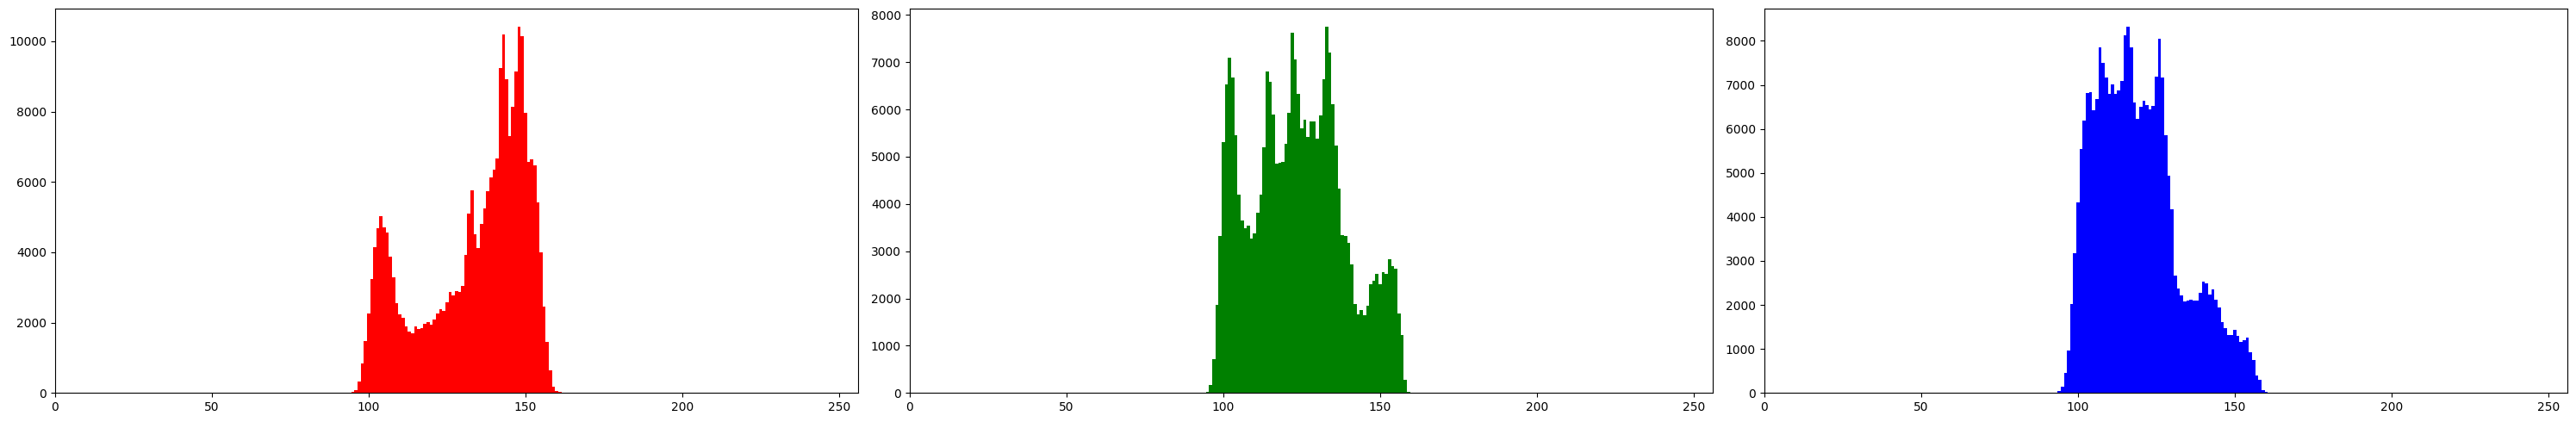

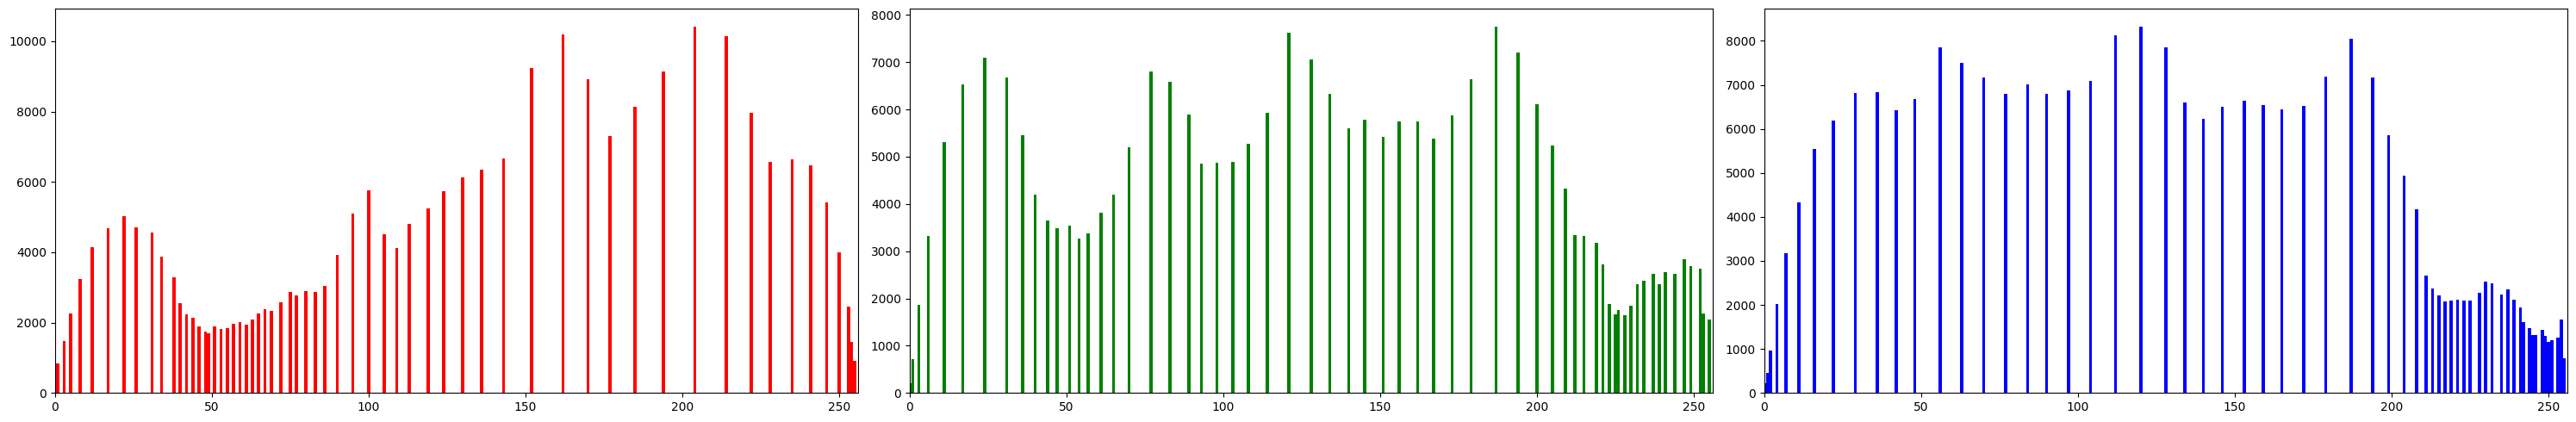

In [ ]:
lena_lc = cv.imread('/content/drive/MyDrive/PCVK/image/lena_lc.jpg')

# Fungsi untuk menampilkan histogram dari gambar
def display_histogram(image):
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Memisahkan channel RGB
    red_channel, green_channel, blue_channel = cv.split(rgb_image)

    # Menghitung histogram menggunakan OpenCV
    red_hist = cv.calcHist([red_channel], [0], None, [256], [0, 256])
    green_hist = cv.calcHist([green_channel], [0], None, [256], [0, 256])
    blue_hist = cv.calcHist([blue_channel], [0], None, [256], [0, 256])

    # Menampilkan histogram
    plt.figure(figsize=(30, 5))

    plt.subplot(1, 3, 1)
    plt.bar(range(256), red_hist[:, 0], color='red', width=1)
    plt.xlim([0, 256])

    plt.subplot(1, 3, 2)
    plt.bar(range(256), green_hist[:, 0], color='green', width=1)
    plt.xlim([0, 256])

    plt.subplot(1, 3, 3)
    plt.bar(range(256), blue_hist[:, 0], color='blue', width=1)
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Fungsi untuk melakukan histogram equalization menggunakan cv.equalizeHist()
def equalize_histogram(image):
    # Memisahkan channel warna
    blue_channel, green_channel, red_channel = cv.split(image)

    # Melakukan equalization pada masing-masing channel
    red_eq = cv.equalizeHist(red_channel)
    green_eq = cv.equalizeHist(green_channel)
    blue_eq = cv.equalizeHist(blue_channel)

    # Menggabungkan kembali channel yang sudah di-equalize
    equalized_image = cv.merge([blue_eq, green_eq, red_eq])
    return equalized_image

# Melakukan histogram equalization pada gambar
equalized_image = equalize_histogram(lena_lc)

# Menggabungkan gambar asli dan hasil equalization untuk perbandingan
combined_image = cv.hconcat([lena_lc, equalized_image])
cv2_imshow(combined_image)

# Menampilkan histogram gambar asli dan hasil equalization
display_histogram(lena_lc)
display_histogram(equalized_image)

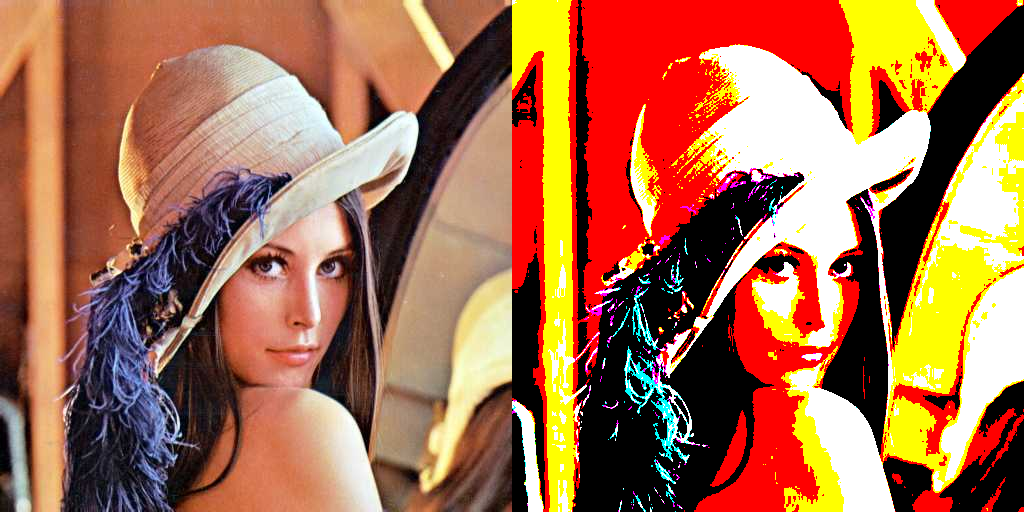

In [ ]:
lena = cv.imread('/content/drive/MyDrive/PCVK/image/lena.jpg')

# Definisikan warna target dalam format RGB
colors = {
    "hitam": (0, 0, 0),
    "hijau": (0, 255, 0),
    "kuning": (255, 255, 0),
    "biru": (0, 0, 255),
    "cyan": (0, 255, 255),
    "magenta": (255, 0, 255),
    "putih": (255, 255, 255)
}

# Fungsi untuk mencari warna terdekat
def get_nearest_color(pixel):
    min_distance = float('inf')
    nearest_color = None
    for color_name, color_rgb in colors.items():
        # Hitung jarak Euclidean
        distance = np.sqrt(np.sum((np.array(pixel) - np.array(color_rgb)) ** 2))
        if distance < min_distance:
            min_distance = distance
            nearest_color = color_rgb
    return nearest_color

# Buat gambar baru dengan warna yang dipetakan
height, width, _ = lena.shape
mapped_image = np.zeros((height, width, 3), dtype=np.uint8)

for i in range(height):
    for j in range(width):
        pixel = lena[i, j]
        mapped_image[i, j] = get_nearest_color(pixel)

# Menampilkan gambar asli dan gambar yang telah dipetakan
combined_image = cv.hconcat([lena, mapped_image])
cv2_imshow(combined_image)

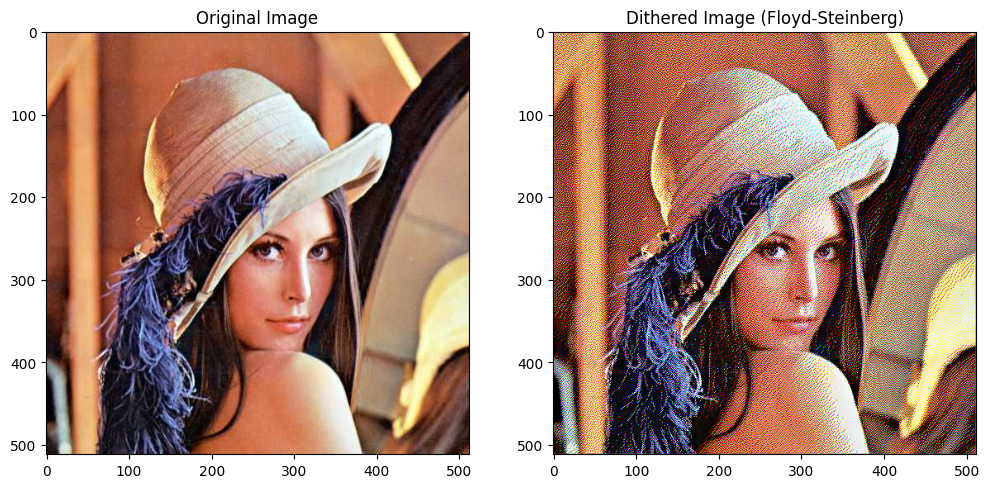

In [ ]:
lena2 = cv.imread('/content/drive/MyDrive/PCVK/image/lena.jpg')
lena2 = cv.cvtColor(lena2, cv.COLOR_BGR2RGB)

img_np = np.array(lena2)

def threshold(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value

def floyd_steinberg(img, jarak_pixel):
    img_new = img.copy()
    img_red = img_new[:, :, 0]
    img_green = img_new[:, :, 1]
    img_blue = img_new[:, :, 2]
    for i in range(img.shape[0] - 1):
        for j in range(img.shape[1] - 1):
            r_old = img_red[i, j]
            g_old = img_green[i, j]
            b_old = img_blue[i, j]

            r_new = np.round(jarak_pixel * r_old / 255.0) * (255 / jarak_pixel)
            g_new = np.round(jarak_pixel * g_old / 255.0) * (255 / jarak_pixel)
            b_new = np.round(jarak_pixel * b_old / 255.0) * (255 / jarak_pixel)

            img_red[i, j] = r_new
            img_green[i, j] = g_new
            img_blue[i, j] = b_new

            error_red = r_old - r_new
            error_green = g_old - g_new
            error_blue = b_old - b_new

            img_red[i + 1, j] = threshold(img_red[i + 1, j] + error_red * 7 / 16)
            img_green[i + 1, j] = threshold(img_green[i + 1, j] + error_green * 7 / 16)
            img_blue[i + 1, j] = threshold(img_blue[i + 1, j] + error_blue * 7 / 16)

            img_red[i - 1, j + 1] = threshold(img_red[i - 1, j + 1] + error_red * 3 / 16)
            img_green[i - 1, j + 1] = threshold(img_green[i - 1, j + 1] + error_green * 3 / 16)
            img_blue[i - 1, j + 1] = threshold(img_blue[i - 1, j + 1] + error_blue * 3 / 16)

            img_red[i, j + 1] = threshold(img_red[i, j + 1] + error_red * 5 / 16)
            img_green[i, j + 1] = threshold(img_green[i, j + 1] + error_green * 5 / 16)
            img_blue[i, j + 1] = threshold(img_blue[i, j + 1] + error_blue * 5 / 16)

            img_red[i + 1, j + 1] = threshold(img_red[i + 1, j + 1] + error_red * 1 / 16)
            img_green[i + 1, j + 1] = threshold(img_green[i + 1, j + 1] + error_green * 1 / 16)
            img_blue[i + 1, j + 1] = threshold(img_blue[i + 1, j + 1] + error_blue * 1 / 16)

    img_dithered = np.stack((img_red, img_green, img_blue), axis=2)
    return np.clip(img_dithered, 0, 255).astype(np.uint8)

dithered_image = floyd_steinberg(img_np, 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(dithered_image)
plt.title('Dithered Image (Floyd-Steinberg)')

plt.show()

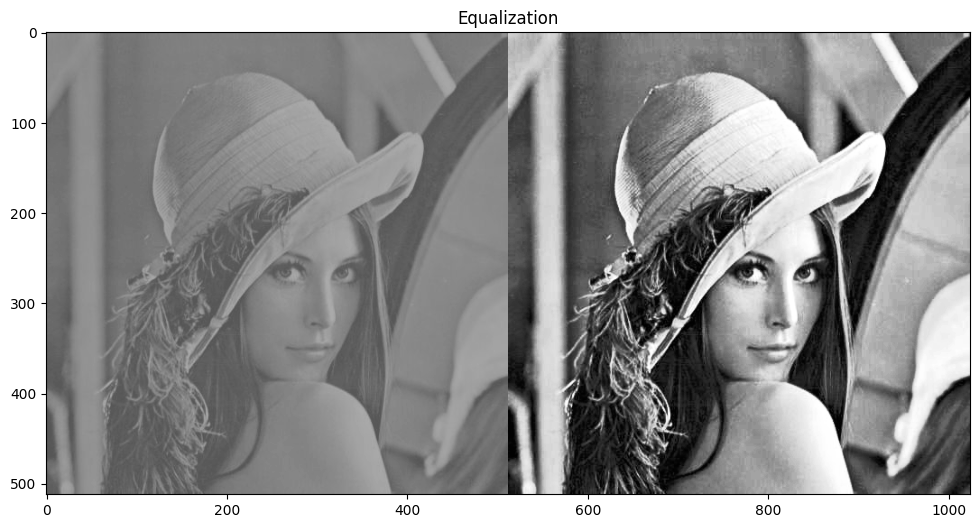

<Figure size 1600x600 with 0 Axes>

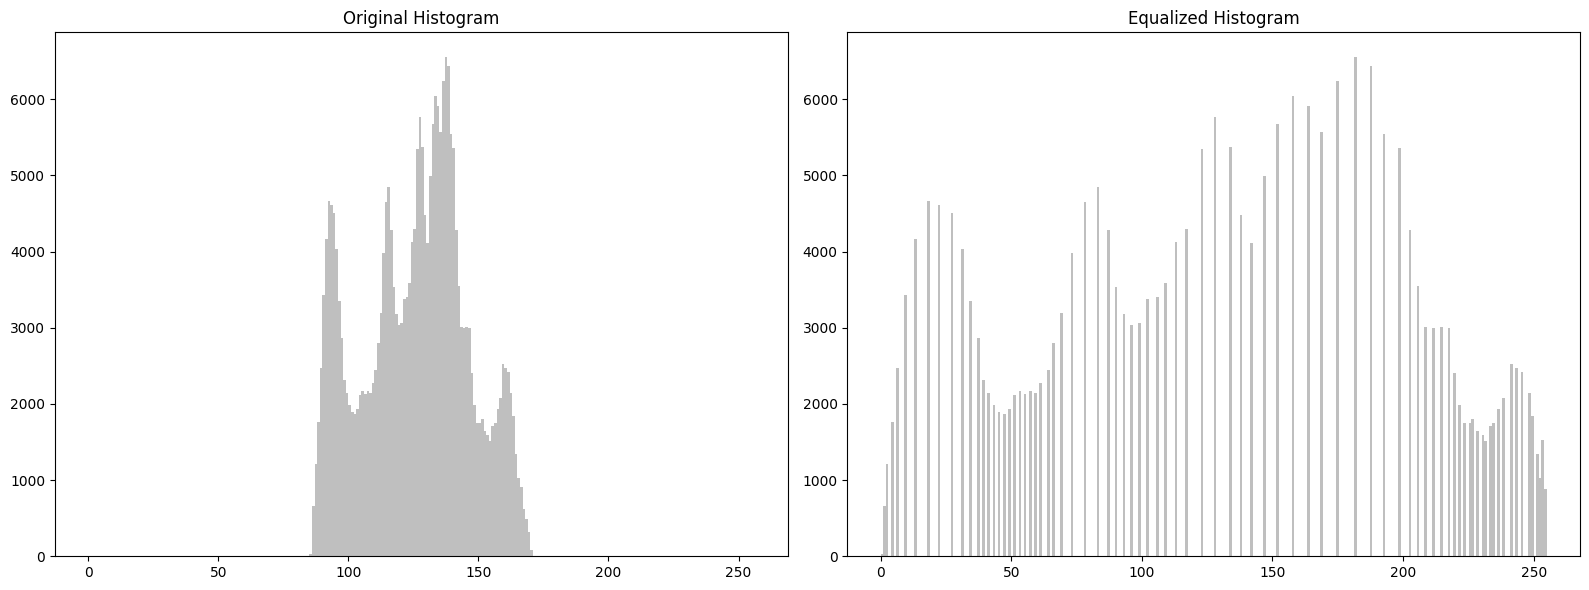

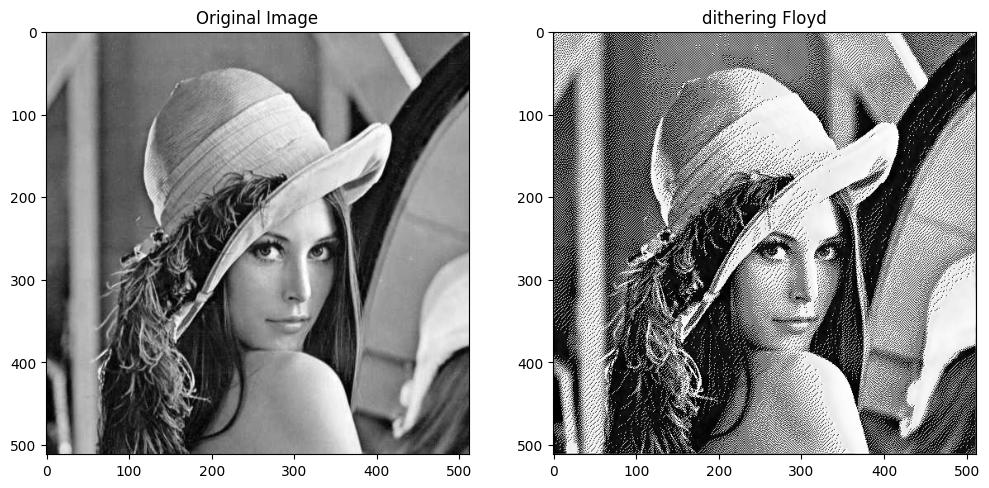

In [ ]:
lena_gs = cv.imread('/content/drive/MyDrive/PCVK/image/lena_gs_lc.jpg', cv.IMREAD_GRAYSCALE)

# Equalize histogram
img_eq = cv.equalizeHist(lena_gs)

# Gabungkan gambar asli dan yang sudah di-equalize
res = np.hstack((lena_gs, img_eq))

# Tampilkan perbedaan gambar asli dan yang sudah di-equalize
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
plt.imshow(res, cmap='gray')
plt.title('Equalization')

plt.show()

# Menampilkan histogram
plt.figure(figsize=(16, 6))
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Histogram gambar asli
axs[0].hist(lena_gs.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.5)
axs[0].set_title('Original Histogram')

# Histogram gambar yang sudah di-equalize
axs[1].hist(img_eq.flatten(), bins=256, color='gray', alpha=0.5)
axs[1].set_title('Equalized Histogram')

plt.tight_layout()
plt.show()

# Floyd-Steinberg dithering
def threshold(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value

def floyd_steinberg(img, jarak_pixel):
    img_gray = img.copy()
    for i in range(img.shape[0] - 1):
        for j in range(img.shape[1] - 1):
            img_old = img_gray[i, j]
            # Hitung nilai piksel baru berdasarkan jarak
            img_new = np.round(jarak_pixel * img_old / 255.0) * (255 / jarak_pixel)

            img_gray[i, j] = img_new
            # Hitung error
            error = img_old - img_new

            # Terapkan Floyd-Steinberg
            # Posisi R1
            img_gray[i + 1, j] = threshold(img_gray[i + 1, j] + error * 7 / 16)
            # Posisi R2
            img_gray[i - 1, j + 1] = threshold(img_gray[i - 1, j + 1] + error * 3 / 16)
            # Posisi R3
            img_gray[i, j + 1] = threshold(img_gray[i, j + 1] + error * 5 / 16)
            # Posisi R4
            img_gray[i + 1, j + 1] = threshold(img_gray[i + 1, j + 1] + error * 1 / 16)

    return np.clip(img_gray, 0, 255).astype(np.uint8)

# Terapkan Floyd-Steinberg pada gambar yang sudah di-equalize
dithered_image = floyd_steinberg(img_eq, 1)

# Tampilkan gambar asli dan hasil dithering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(lena_gs, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(dithered_image, cmap='gray')
plt.title('dithering Floyd')

plt.show()